---
# ***Global Terrorism Dataset*** 

![](https://www.sciencespo.fr/psia/sites/sciencespo.fr.psia/files/GTI-2023-map-graphic-scaled2cca.jpg?1681914472)

## ***Context***
Information on more than 180,000 Terrorist Attacks
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. 
The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. 
The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.
For more information - https://www.start.umd.edu/gtd/

## ***Content***
Geography: Worldwide
Time period: 1970-2017, except 1993
Unit of analysis: Attack
Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes
Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)
Definition of terrorism:
"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."
See the GTD Codebook, - https://www.start.umd.edu/gtd/downloads/Codebook.pdf - for important details on data collection methodology, definitions, and coding schema.

## ***Acknowledgements***
The Global Terrorism Database is funded through START, by the US Department of State (Contract Number: SAQMMA12M1292) and the US Department of Homeland Security Science and Technology Directorate’s Office of University Programs (Award Number 2012-ST-061-CS0001, CSTAB 3.1). The coding decisions and classifications contained in the database are determined independently by START researchers and should not be interpreted as necessarily representing the official views or policies of the United States Government.

## Imports & creating the data frame

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',150)
sns.set_style("ticks")

In [3]:
df = pd.read_csv('/kaggle/input/gtd/globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1", low_memory=False)
df.shape

(181691, 135)

---

## Resorting the data and renaming the columns

In [4]:
df = df[['iyear','country','country_txt','region','region_txt','city','alternative','alternative_txt','success','suicide','attacktype1','attacktype1_txt','targtype1','targtype1_txt','targsubtype1','targsubtype1_txt',
    'corp1','target1','natlty1','natlty1_txt','gname','nperps','claimed','claimmode','claimmode_txt','weaptype1','weaptype1_txt','weapsubtype1','weapsubtype1_txt','weapdetail',
    'nkill','nwound','property','propextent','propextent_txt','propvalue','propcomment','ishostkid','nhostkid','nhours','ndays', 'kidhijcountry',
    'ransom','ransomamt','ransompaid','hostkidoutcome','hostkidoutcome_txt','nreleased']]

In [5]:
df.rename(columns = {'iyear':'year', 
                     'country':'country_id',
                     'country_txt': 'country_name',
                     'region':'region_id',
                     'region_txt':'region_name', 
                     'alternative':'terror_action_id',
                     'alternative_txt':'terror_action',
                     'success':'attack_was_successful',
                     'suicide':'attack_commited_suicide',
                     'attacktype1':'attack_type_id',
                     'attacktype1_txt':'attack_type',
                     'targtype1':'target_type_id', 
                     'targtype1_txt':'target_type', 
                     'targsubtype1':'target_sub_type_id', 
                     'targsubtype1_txt':'target_sub_type', 
                     'corp1':'corporation_was_attacked',
                     'target1':'attack_target', 
                     'natlty1':'attacked_state_id', 
                     'natlty1_txt':'attacked_state', 
                     'gname':'terror_group', 
                     'nperps':'num_of_terrorists',
                     'claimed':'terror_group_claimed_attacks',
                     'claimmode':'claim_id', 
                     'claimmode_txt':'claim_method',
                     'weaptype1':'weapon_type_id', 
                     'weaptype1_txt':'weapon_type', 
                     'weapsubtype1':'weapon_sub_type_id',
                     'weapsubtype1_txt':'weapon_type_specific ', 
                     'weapdetail':'weapon', 
                     'nkill':'confirmed_fatalities', 
                     'nwound':'num_of_woundeds', 
                     'property':'damage_to_property',
                     'propextent':'property_damages_id',
                     'propextent_txt':'property_damages', 
                     'propvalue':'property_damage_values', 
                     'propcomment':'specific_items', 
                     'ishostkid':'hostages_kids',
                     'nhostkid':'num_of_kids_hostages',
                     'nhours':'duration_in_hours',
                     'ndays':'duration_in_days', 
                     'kidhijcountry':'country_kidnapping_occurred', 
                     'ransom':'was_there_ransom', 
                     'ransomamt':'ransom_amount', 
                     'ransompaid':'ransom_paid', 
                     'hostkidoutcome':'kidnap_outcome_id', 
                     'hostkidoutcome_txt':'kidnap_outcome', 
                     'nreleased':'num_of_kidnapped_released'},
          inplace = True)

### See if column names have changed

In [6]:
df.head()

,year,country_id,country_name,region_id,region_name,city,terror_action_id,terror_action,attack_was_successful,attack_commited_suicide,attack_type_id,attack_type,target_type_id,target_type,target_sub_type_id,target_sub_type,corporation_was_attacked,attack_target,attacked_state_id,attacked_state,terror_group,num_of_terrorists,terror_group_claimed_attacks,claim_id,claim_method,weapon_type_id,weapon_type,weapon_sub_type_id,weapon_type_specific,weapon,confirmed_fatalities,num_of_woundeds,damage_to_property,property_damages_id,property_damages,property_damage_values,specific_items,hostages_kids,num_of_kids_hostages,duration_in_hours,duration_in_days,country_kidnapping_occurred,was_there_ransom,ransom_amount,ransom_paid,kidnap_outcome_id,kidnap_outcome,num_of_kidnapped_released
0,1970,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,NaN,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,1970,130,Mexico,1,North America,Mexico city,NaN,NaN,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,7.0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN
2,1970,160,Philippines,5,Southeast Asia,Unknown,NaN,NaN,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1970,78,Greece,8,Western Europe,Athens,NaN,NaN,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,1970,101,Japan,4,East Asia,Fukouka,NaN,NaN,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,NaN,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


---

## Replacing nulls & NaN

In [7]:
ui = df.fillna('Unattainable Information', inplace=True)

### See where we have unknown values

In [8]:
c =df.columns
cols = df[c]=='Unknown'
cols.sum().index

Index(['year', 'country_id', 'country_name', 'region_id', 'region_name',
       'city', 'terror_action_id', 'terror_action', 'attack_was_successful',
       'attack_commited_suicide', 'attack_type_id', 'attack_type',
       'target_type_id', 'target_type', 'target_sub_type_id',
       'target_sub_type', 'corporation_was_attacked', 'attack_target',
       'attacked_state_id', 'attacked_state', 'terror_group',
       'num_of_terrorists', 'terror_group_claimed_attacks', 'claim_id',
       'claim_method', 'weapon_type_id', 'weapon_type', 'weapon_sub_type_id',
       'weapon_type_specific ', 'weapon', 'confirmed_fatalities',
       'num_of_woundeds', 'damage_to_property', 'property_damages_id',
       'property_damages', 'property_damage_values', 'specific_items',
       'hostages_kids', 'num_of_kids_hostages', 'duration_in_hours',
       'duration_in_days', 'country_kidnapping_occurred', 'was_there_ransom',
       'ransom_amount', 'ransom_paid', 'kidnap_outcome_id', 'kidnap_outcome',
     

---

## Top 10 unknown attacks
* Instead of having an unknown reason for the attacks

In [9]:
unknown_attacks = df[['attacked_state','attack_type']]
unknown_attacks = unknown_attacks.loc[unknown_attacks['attack_type']=='Unknown']
top_10_unknown_attacks=unknown_attacks[['attacked_state','attack_type']].groupby(
    ['attacked_state']).count().sort_values(by='attack_type', ascending=False).head(10)
top_10_unknown_attacks=top_10_unknown_attacks.sort_values(by='attack_type', ascending=False)
top_10_unknown_attacks

,attack_type
attacked_state,
Afghanistan,1109
Iraq,757
Colombia,386
Yemen,347
India,310
Philippines,285
Somalia,248
International,233
Pakistan,221


### Graph

Text(0.5, 1.0, 'Unknown Attacks per Top 10 Countries')

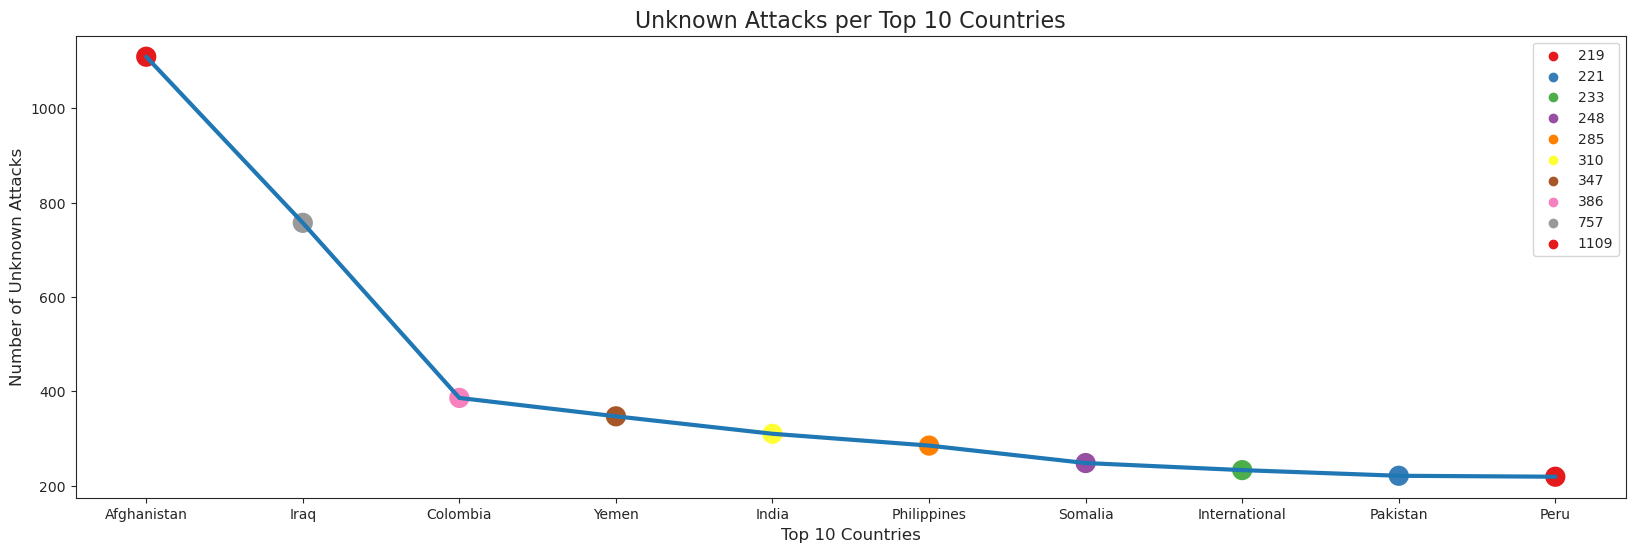

In [10]:
f, ax = plt.subplots(figsize=(20, 6))
sns.scatterplot(top_10_unknown_attacks, x='attacked_state', y='attack_type', s=250, hue='attack_type', palette="Set1")
sns.lineplot(top_10_unknown_attacks, x='attacked_state', y='attack_type', linewidth=3)
plt.xlabel('Top 10 Countries', fontsize=12)
plt.ylabel('Number of Unknown Attacks', fontsize=12)
plt.title('Unknown Attacks per Top 10 Countries', fontsize=16)

---

## Counting terrorist attacks in the top 15 country
* Counting the states the attack occured

In [11]:
countries_attacked=df[['attacked_state','terror_group','attack_type']]
top_15_attacked_country = countries_attacked['attacked_state'].groupby(countries_attacked['attacked_state'])\
.count().sort_values(ascending=False).head(15)
countries_attacked[['attacked_state','terror_group']].groupby(['attacked_state']).count()\
.sort_values(by='terror_group', ascending=False).head(15)

,terror_group
attacked_state,
Iraq,24113
Pakistan,13900
India,12098
Afghanistan,10931
Colombia,7922
Philippines,6685
Peru,5840
El Salvador,5212
United States,5065


### Graph

Text(0.5, 1.0, 'Attacks per  Top 15 Countries')

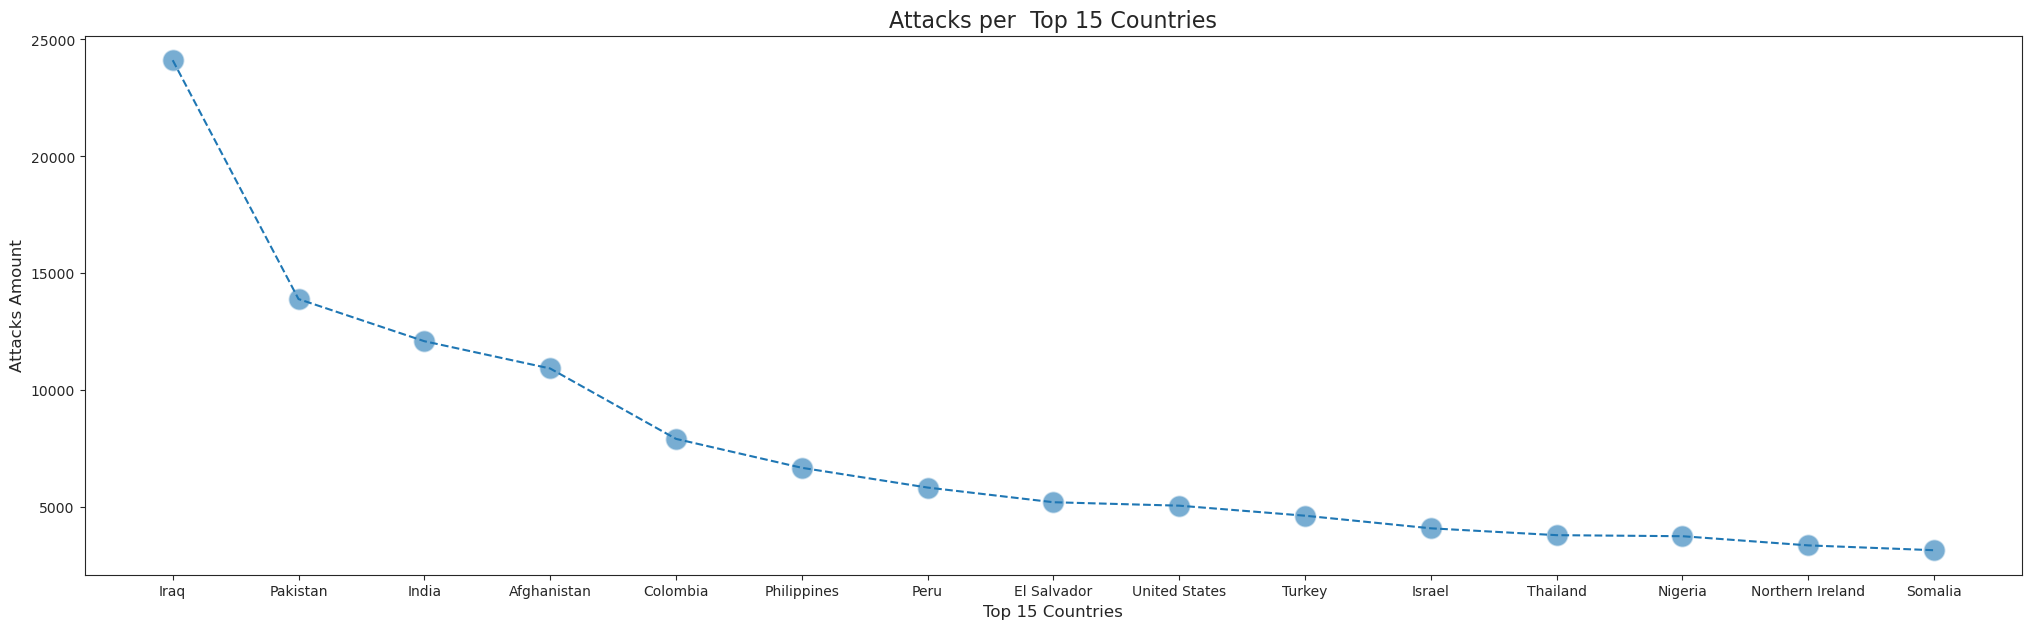

In [12]:
f, ax = plt.subplots(figsize=(25, 7))
sns.lineplot(top_15_attacked_country,linewidth = 1.5, linestyle='dashed')
sns.scatterplot(top_15_attacked_country, legend=False, alpha=0.6, s=250)
x = plt.xlabel('Top 15 Countries', fontsize=12)
y = plt.ylabel('Attacks Amount', fontsize=12)
plt.title('Attacks per  Top 15 Countries', fontsize=16)

### Graph

In [13]:
a = px.bar(top_15_attacked_country,color=top_15_attacked_country,
             labels={'index':'Country','value':'Amount', 'color':"Amount"},height=600)

a.update_layout(
    title={'text': "Top 15 Terror Groups", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})

a.show()

---

## Counting attack types
* Attack types and their amount

In [14]:
df['num_of_attacks'] = df['attack_type']
attacks = df[['attack_type','num_of_attacks']]
attacks = attacks[['num_of_attacks']].groupby(attacks['attack_type']).count()
attacks = attacks.drop('Unknown')

In [15]:
attacks.sort_values('num_of_attacks', ascending=False)

,num_of_attacks
attack_type,
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


### Graph

Text(0.5, 1.0, 'Attacks & Types')

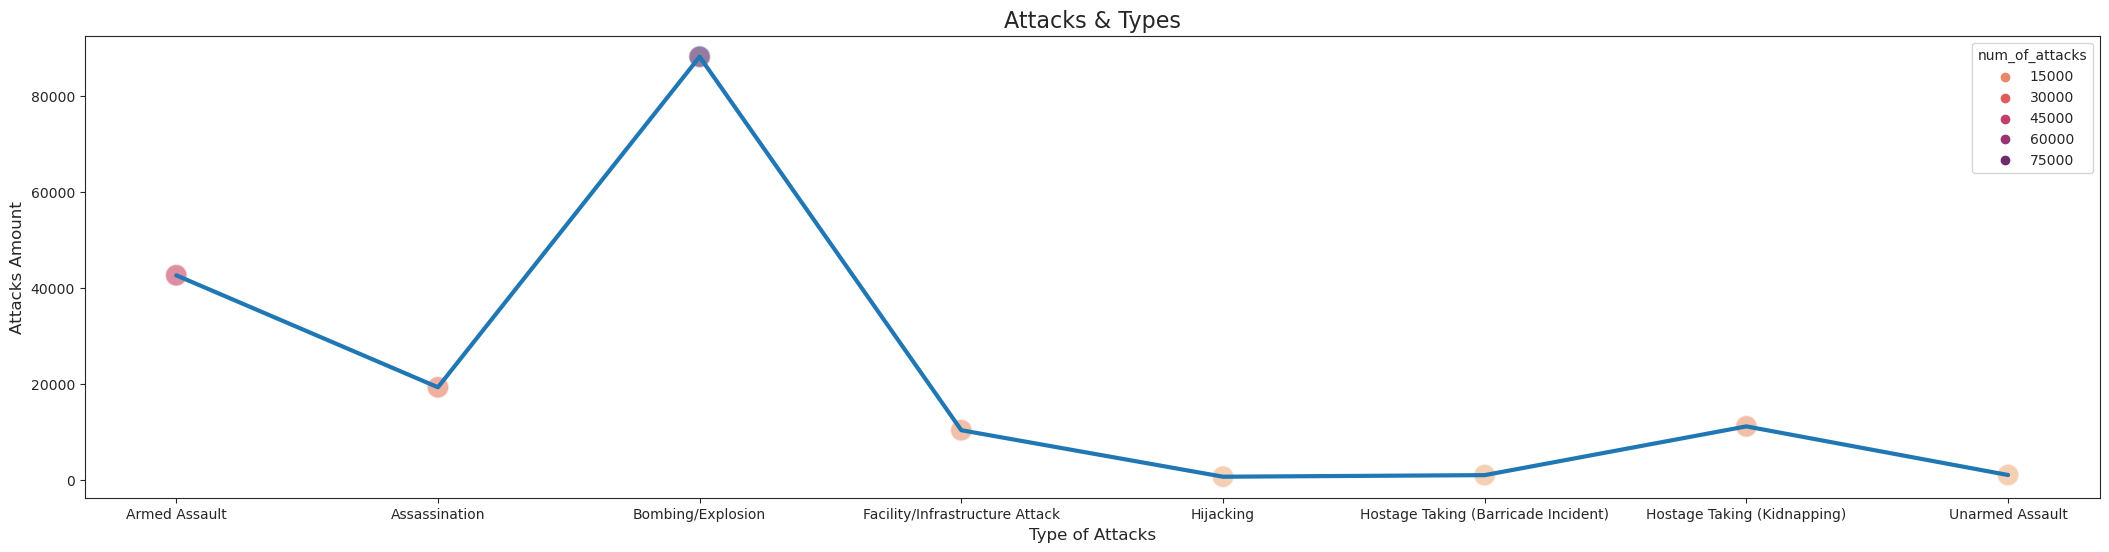

In [16]:
f, ax = plt.subplots(figsize=(26, 6))
sns.lineplot(attacks, legend=False, linewidth=3)
sns.scatterplot(attacks, x='attack_type', y='num_of_attacks', legend=True, hue='num_of_attacks', palette='flare', alpha=0.6, s=250)
plt.xlabel('Type of Attacks', fontsize=12)
plt.ylabel('Attacks Amount', fontsize=12)
plt.title('Attacks & Types', fontsize=16)

---

## Terrorist attacks success rate in %

In [17]:
successful_attacks = df.loc[df['attack_was_successful']==1].count()
total_attacks = df.loc[df['attack_was_successful']].count()

success_rate = successful_attacks/total_attacks*100
success_rate = success_rate['attack_was_successful'].round()
print(f'Terrorist attacks were successful',success_rate,'%')

Terrorist attacks were successful 89.0 %


## Terrorist attacks failed rate in %

In [18]:
failed_attacks = df.loc[df['attack_was_successful']==0].count()

failed_rate = failed_attacks/total_attacks*100
failed_rate = failed_rate['attack_was_successful'].round()
print(f'Terrorist attacks were failed',failed_rate,'%')

Terrorist attacks were failed 11.0 %


---

## Counting target type

In [19]:
targets = df['target_type'].groupby(df['target_type']).count().sort_values(ascending=False)
top_10_targets = targets.drop(['Unknown','Other']).head(10)
top_10_targets

target_type
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Name: target_type, dtype: int64

### Graph

Text(0.5, 1.0, 'Targets of Attacks')

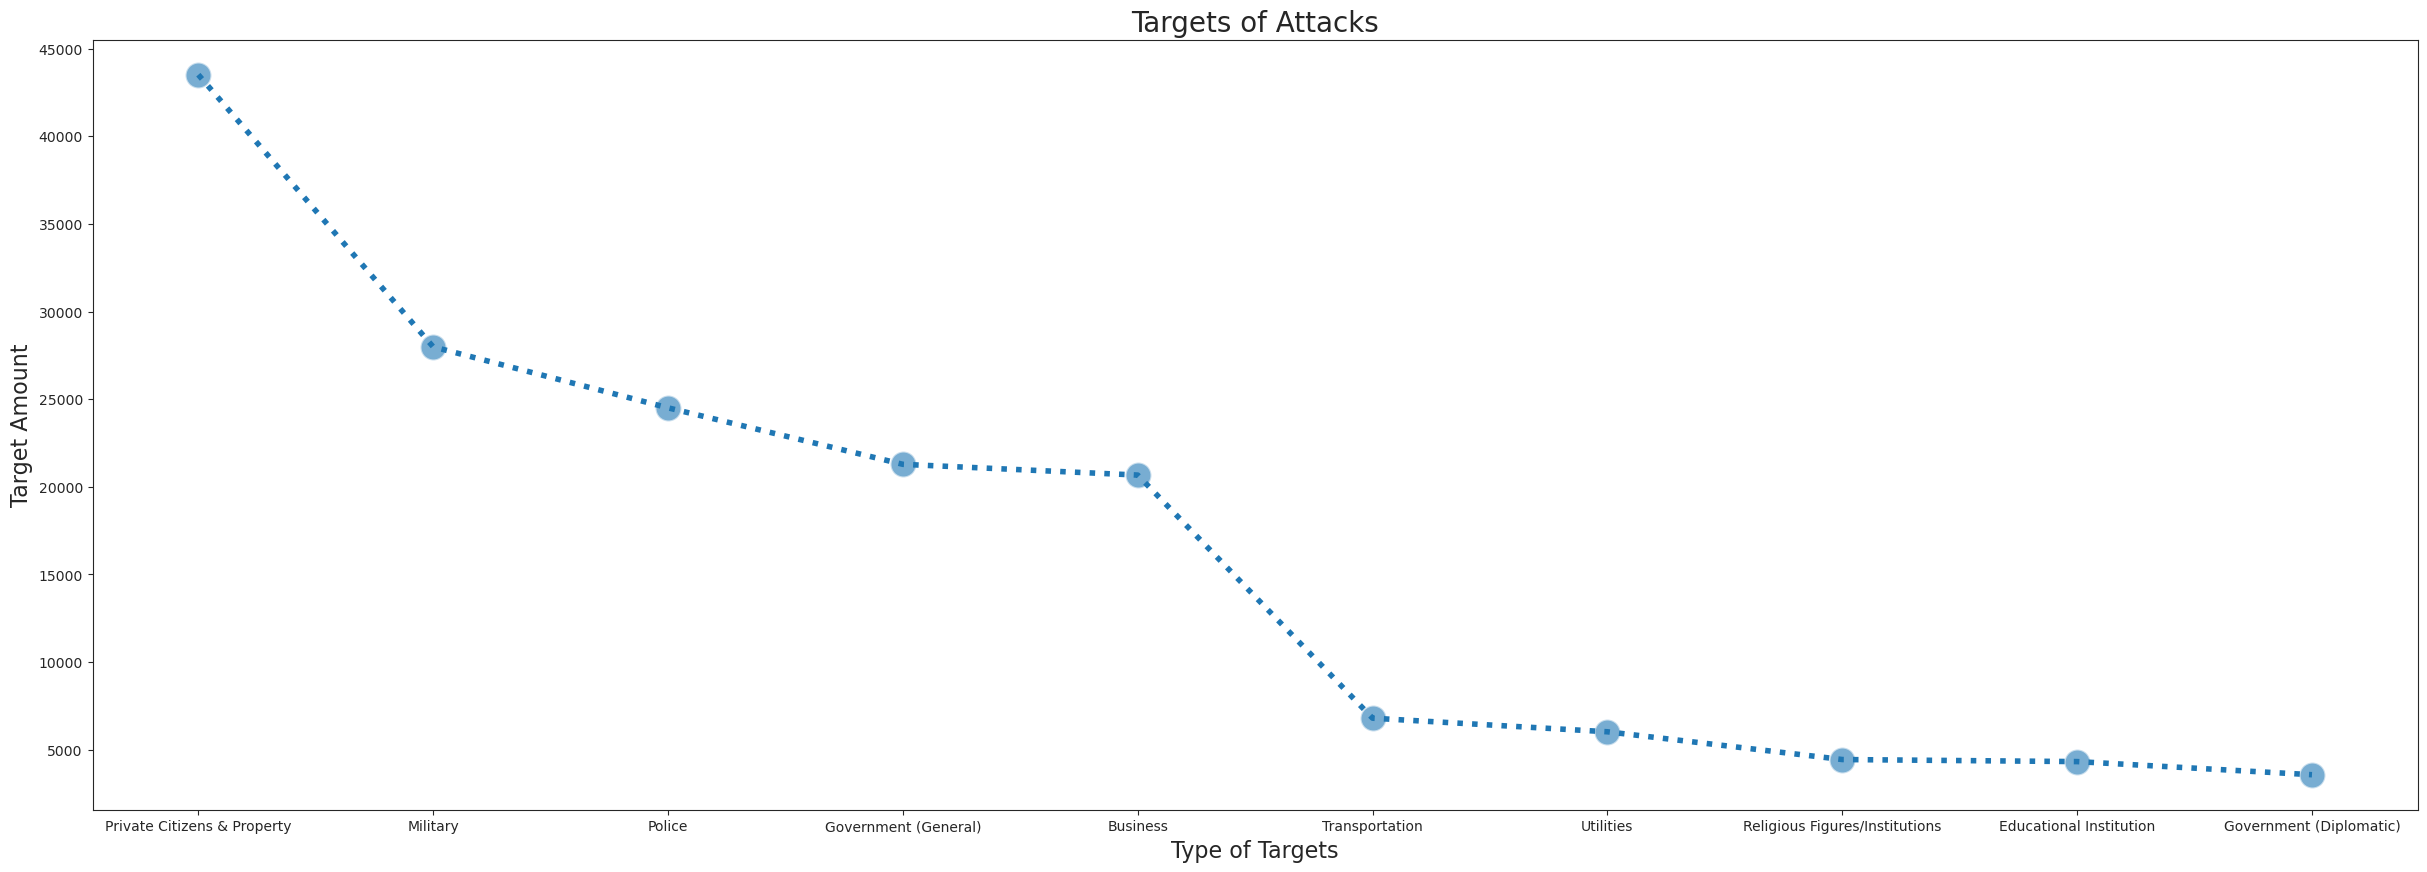

In [20]:
f, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(top_10_targets,linewidth = 4,linestyle='dotted')
sns.scatterplot(top_10_targets, alpha=0.6, s=350)
x = plt.xlabel('Type of Targets', fontsize=16)
y = plt.ylabel('Target Amount', fontsize=16)
plt.title('Targets of Attacks', fontsize=20)

---

## Terrorist Groups

In [21]:
groups = df[['country_id','terror_group']]
top_10_groups = groups.groupby(groups['terror_group']).count().sort_values(by='country_id',ascending=False).drop('Unknown').head(10)
top_10_groups

,country_id
terror_group,
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


Text(0.5, 1.0, 'Top 10 Terrorist Groups')

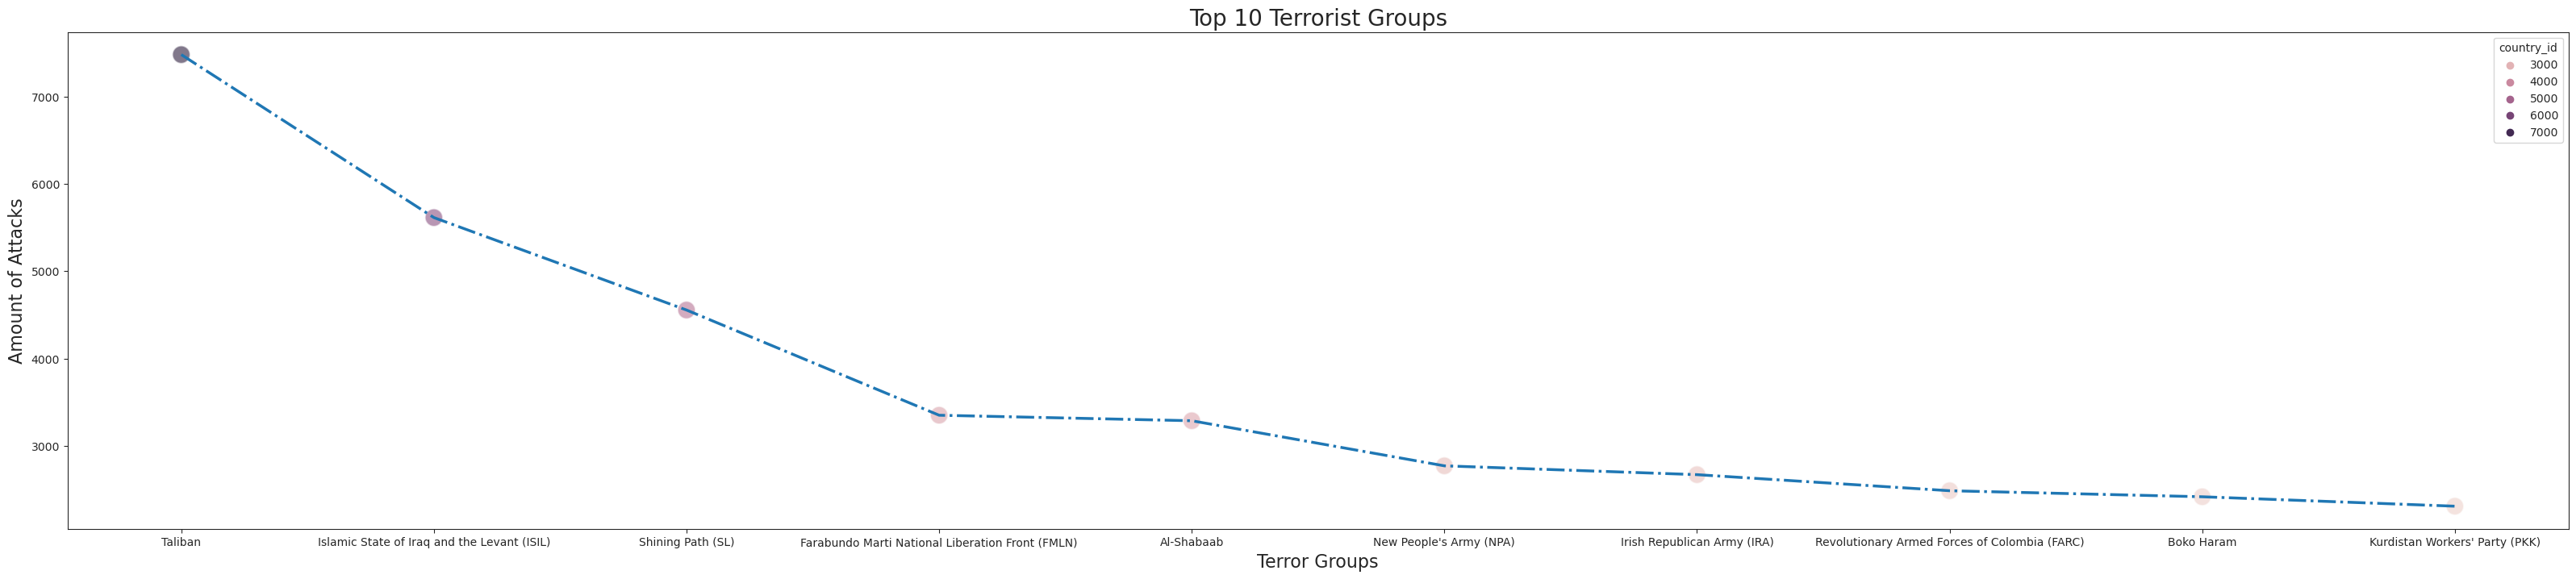

In [22]:
f, ax = plt.subplots(figsize=(40, 8))
sns.lineplot(top_10_groups, x='terror_group', y='country_id',linewidth=2.5, linestyle='dashdot')
sns.scatterplot(top_10_groups,x='terror_group', y='country_id',s=250, alpha=0.6, hue='country_id')
plt.ylabel("Amount of Attacks", fontsize=16)
plt.xlabel("Terror Groups", fontsize=16)
plt.title('Top 10 Terrorist Groups', fontsize=20)

---

## Weapons used at the attacks

In [23]:
a = df[['weapon_type','weapon']]

weapons = a['weapon'].groupby(a['weapon_type']).count().drop('Unknown').sort_values(ascending=False)
weapons

weapon_type
Explosives                                                                     92426
Firearms                                                                       58524
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                                      14
Name: weapon, dtype: int64

### Graph

Text(0, 0.5, 'Weapon Used')

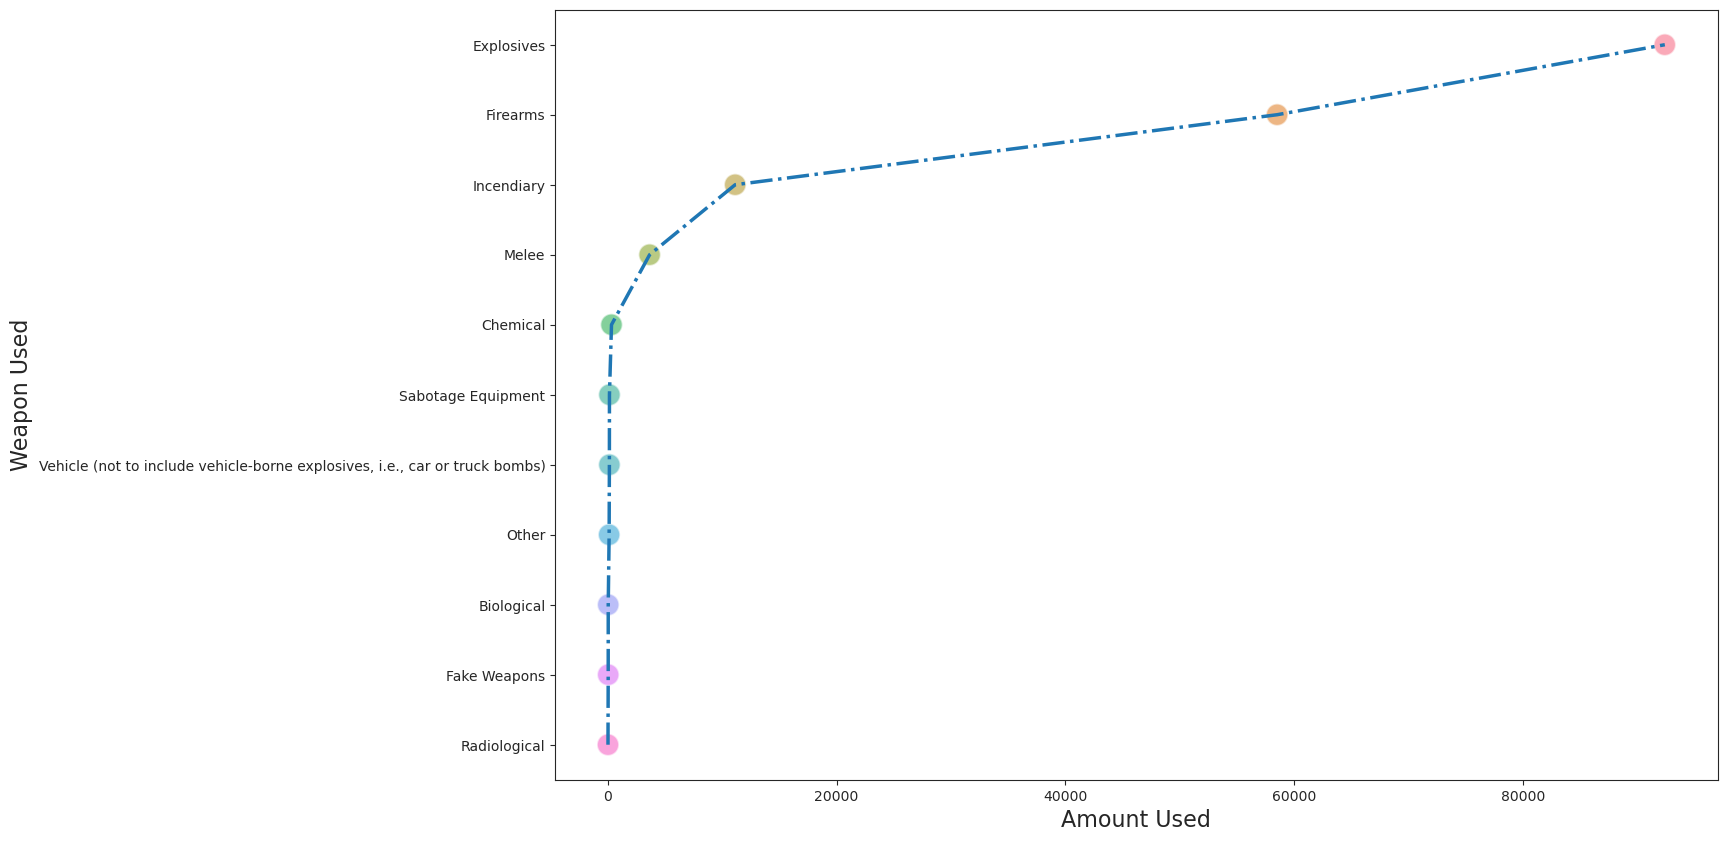

In [24]:
f, ax = plt.subplots(figsize=(15,10))
sns.lineplot(weapons, x=weapons, y='weapon_type', linewidth=2.5, linestyle='dashdot')
sns.scatterplot(weapons, x=weapons, y='weapon_type', s=250 , alpha=0.6, hue='weapon_type', legend=False)
plt.xlabel('Amount Used', fontsize=16)
plt.ylabel('Weapon Used', fontsize=16)

### Graph

In [25]:
c = px.bar(weapons, color=weapons, height=600,
           labels={'weapon_type':'Weapon Type','value':'Amount','color':'Amount'})

c.update_layout(
    title={'text': "Weapon Type & Amount", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})

c.show()

---

## Attack throught the years

In [26]:
yt=df[['year','attack_type']]
yt=yt[['year','attack_type']].groupby('year').count().sort_values(by='year', ascending=True)
yt.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017],
           dtype='int64', name='year')

## Graph

Text(0.5, 0, 'Year')

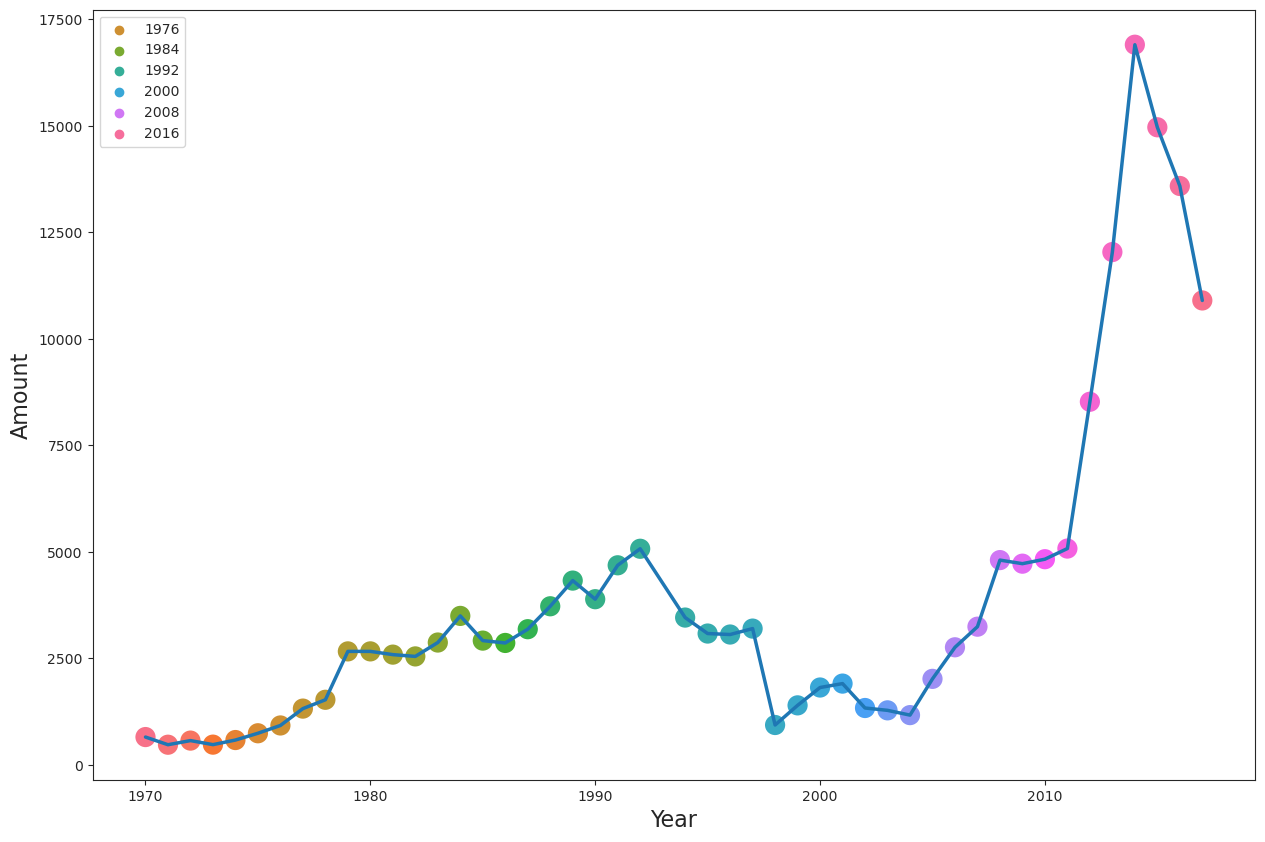

In [27]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(yt, y='attack_type', x='year', s=250, hue='year', palette="husl")
sns.lineplot(yt, y='attack_type', x='year', linewidth=2.5)
plt.ylabel('Amount', fontsize=16)
plt.xlabel('Year', fontsize=16)

### Graph

In [28]:
d=px.bar(yt, x='attack_type', height=600,color='attack_type',
        labels={'attack_type': 'Amount', 'year': 'Year','value': 'Amount'})
d.show()